In [42]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [26]:
path = "C:/Users/OJASWI/OneDrive/Desktop/Arctic Analysis"
files = sorted(glob.glob(path + "/N_*_extent_v4.0.csv"))

df_list = [pd.read_csv(f) for f in files]
data = pd.concat(df_list, ignore_index=True)
print(data)

#data["date"] = pd.to_datetime(dict(year=data["year"], month=data["mo"], day=15))
#data = data.sort_values("date")

print(data.head())

     year   mo  source_dataset   region   extent     area
0    1979    1      NSIDC-0051        N    15.41    12.41
1    1980    1      NSIDC-0051        N    14.86    11.94
2    1981    1      NSIDC-0051        N    14.91    11.91
3    1982    1      NSIDC-0051        N    15.18    12.19
4    1983    1      NSIDC-0051        N    14.94    12.01
..    ...  ...             ...      ...      ...      ...
558  2020   12      NSIDC-0051        N    11.73    10.16
559  2021   12      NSIDC-0051        N    12.15    10.74
560  2022   12      NSIDC-0051        N    11.89    10.27
561  2023   12      NSIDC-0051        N    11.98    10.34
562  2024   12      NSIDC-0051        N    11.41    10.03

[563 rows x 6 columns]
   year   mo  source_dataset   region   extent     area
0  1979    1      NSIDC-0051        N    15.41    12.41
1  1980    1      NSIDC-0051        N    14.86    11.94
2  1981    1      NSIDC-0051        N    14.91    11.91
3  1982    1      NSIDC-0051        N    15.18    12.19


In [30]:
data.columns = data.columns.str.strip()

# Convert to numeric and replace invalid fill values
data["extent"] = pd.to_numeric(data["extent"], errors="coerce")

# Remove rows with missing or invalid extent values
data = data[(data["extent"] > 0) & (data["extent"] < 20)]


count    561.000000
mean      11.313244
std        3.286098
min        3.570000
25%        8.470000
50%       12.020000
75%       14.200000
max       16.340000
Name: extent, dtype: float64


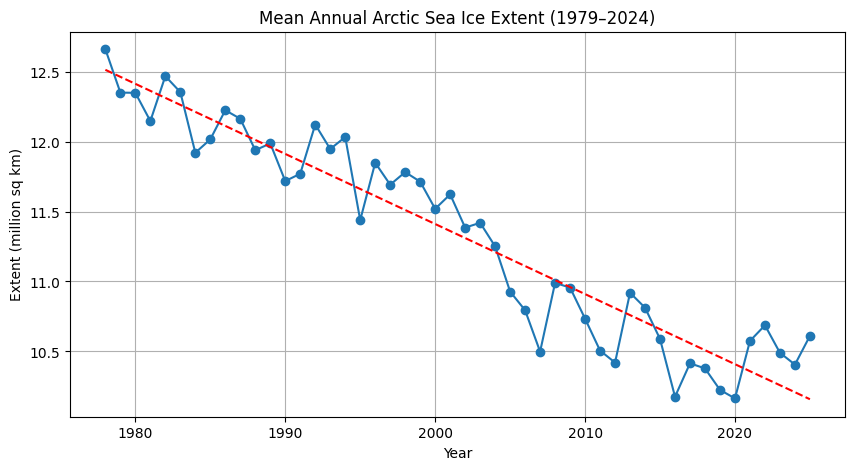

In [36]:
annual_mean = data.groupby("year")["extent"].mean().reset_index()
print(data["extent"].describe())

coeffs = np.polyfit(annual_mean['year'], annual_mean['extent'], 1)
trend = np.poly1d(coeffs)

plt.figure(figsize=(10,5))
plt.plot(annual_mean['year'], annual_mean['extent'], 'o-', label='Observed Extent')
plt.plot(annual_mean['year'], trend(annual_mean['year']), 'r--', label=f'Trend: {coeffs[0]:.3f} × Year + {coeffs[1]:.1f}')

plt.title("Mean Annual Arctic Sea Ice Extent (1979–2024)")
plt.xlabel("Year")
plt.ylabel("Extent (million sq km)")
plt.grid(True)
plt.show()


In [38]:
heatmap_data = data.pivot_table(
    index='year',
    columns='mo',
    values='extent',
    aggfunc='mean'
)
heatmap_data.head()

mo,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.65,13.67
1979,15.41,16.18,16.34,15.45,13.86,12.53,10.31,8.04,7.05,8.75,10.94,13.34
1980,14.86,15.96,16.04,15.43,13.79,12.20,10.10,7.98,7.67,9.18,11.38,13.59
1981,14.91,15.60,15.63,15.01,13.80,12.43,10.27,7.84,7.14,8.86,10.93,13.34
1982,15.18,15.97,16.04,15.47,13.97,12.48,10.37,8.14,7.30,9.42,11.63,13.64


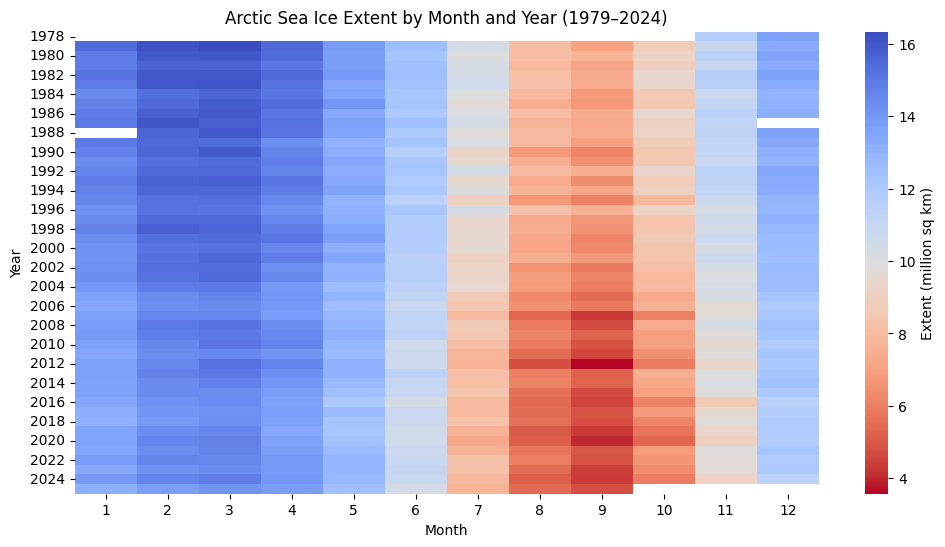

In [52]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm_r', cbar_kws={'label': 'Extent (million sq km)'})

plt.title('Arctic Sea Ice Extent by Month and Year (1979–2024)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [1]:
'''np.random.seed(42)
data['sst'] = 0.02 * (data['year'] - data['year'].min()) + np.random.normal(0, 0.5, len(data))

corr = data[['extent', 'sst']].corr().iloc[0, 1]
print(f"Correlation between Sea Ice Extent and SST: {corr:.2f}")

plt.figure(figsize=(8,5))
sns.regplot(data=data, x='sst', y='extent', color='royalblue', scatter_kws={'alpha':0.5})
plt.title(f"Sea Ice Extent vs SST (r = {corr:.2f})")
plt.xlabel("Sea Surface Temperature (°C)")
plt.ylabel("Sea Ice Extent (million sq km)")
plt.show()'''


'np.random.seed(42)\ndata[\'sst\'] = 0.02 * (data[\'year\'] - data[\'year\'].min()) + np.random.normal(0, 0.5, len(data))\n\ncorr = data[[\'extent\', \'sst\']].corr().iloc[0, 1]\nprint(f"Correlation between Sea Ice Extent and SST: {corr:.2f}")\n\nplt.figure(figsize=(8,5))\nsns.regplot(data=data, x=\'sst\', y=\'extent\', color=\'royalblue\', scatter_kws={\'alpha\':0.5})\nplt.title(f"Sea Ice Extent vs SST (r = {corr:.2f})")\nplt.xlabel("Sea Surface Temperature (°C)")\nplt.ylabel("Sea Ice Extent (million sq km)")\nplt.show()'